# **Exploring Unsupervised Machine Learning**


Task #3 of the TSF internship.

From the ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Import & Read

Import libraries and read data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import cluster

data = datasets.load_iris()
iris_x = pd.DataFrame(data.data, columns=data.feature_names)
iris_y = pd.DataFrame(data.target_names).values

## Cluster & Plot

### No. of Clusters

Find optimum no. of clusters using the elbow method.

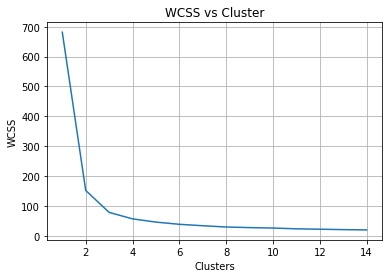

In [5]:
# optimum clusters using elbow method
x = iris_x.values
wcss = []

for i in range(1, 15):
  k = cluster.KMeans(n_clusters = i, random_state = 0).fit(x)
  # elbow using sum of squares within cluster i.e. inertia
  wcss.append(k.inertia_)

plt.plot(range(1,15), wcss)
plt.ylabel("WCSS")
plt.xlabel("Clusters")
plt.title("WCSS vs Cluster")
plt.grid(True)
plt.show()

We can see from the above graph, the elbow occurs at cluster = 3. 
Thus we will cluster accordingly.

In [ ]:
k = cluster.KMeans(n_clusters = 3, random_state = 0)
y = k.fit_predict(x)

### Plot

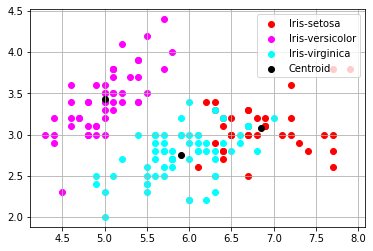

In [ ]:
colors = ["red", "magenta", "cyan"]
for i in range(3):
  label = "Iris-" + str(iris_y[i][0])
  plt.scatter(x[y==i, 0], x[y==i, 1], c = colors[i], label = label)
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], c = "black", label = "Centroid")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()